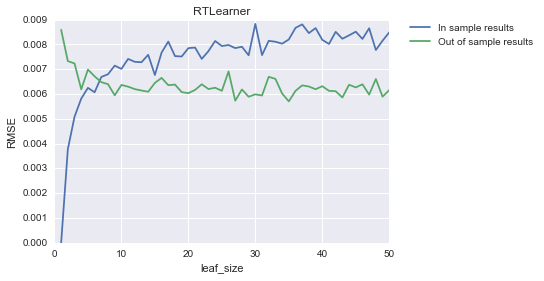

In [47]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from util import get_data, plot_data
import math
import seaborn as sns

class DecisionNode():
    def __init__(self, left,right,decision_function,val=None):
        self.left = left
        self.right = right
        self.decision_function = decision_function
        self.val = val
    def decide(self, feature):
        """Return on a label if node is leaf,or pass the decision down to the node's left/right child (depending on decisionfunction)."""
        if self.val is not None:
            return self.val
        elif self.decision_function(feature):
            return self.left.decide(feature)
        else:
            return self.right.decide(feature)
 
class RTLearner(object):
    def __init__(self,leaf_size = 1,verbose = False):
        self.leaf_size = leaf_size
        self.total_leaves = 0
        self.root = None

    def get_total_leaves(self):
        return self.total_leaves

    def build_tree(self,dataX,dataY):
        if len(dataY)<=self.leaf_size:
            self.total_leaves = self.total_leaves + 1
            return DecisionNode(None,None,None,val=np.average(dataY))
        
        #SPLIT DATA
        selected_feature = np.random.randint(dataX.shape[1])
        selected_rows = np.random.choice(np.arange(dataX.shape[0]), size=2, replace=False)
        selected_data1 = dataX[selected_rows[0],selected_feature]
        selected_data2 = dataX[selected_rows[1],selected_feature]
        split_val = (selected_data1+selected_data2)/2.
        dataX_left = np.asarray( [j for i,j in zip(dataX[:,selected_feature],dataX) if i<=split_val] )
        dataY_left = np.asarray( [j for i,j in zip(dataX[:,selected_feature],dataY) if i<=split_val] )
        dataX_right = np.asarray( [j for i,j in zip(dataX[:,selected_feature],dataX) if i>split_val] )
        dataY_right = np.asarray( [j for i,j in zip(dataX[:,selected_feature],dataY) if i>split_val] )

        #EXCEPTION HANDLING: a tie on split_val
        if dataX_left.shape[0]==0 or dataX_right.shape[0]==0:
            dataX_left = dataX[0:1,:]
            dataY_left = dataY[0:1]
            dataX_right = dataX[1:,:]
            dataY_right = dataY[1:]
  
        return DecisionNode(self.build_tree(dataX_left,dataY_left),self.build_tree(dataX_right,dataY_right),lambda x:x[selected_feature]<=split_val,None)

    def addEvidence(self,dataX,dataY):
        self.root = self.build_tree(dataX,dataY)

    def query(self,points):
        return [self.root.decide(example) for example in points]


file = 'Istanbul.csv'
inf = open('Istanbul.csv')
data = None
if file == 'Istanbul.csv':
    data = np.array([map(float, s.strip().split(',')[1:]) for s in inf.readlines()[1:]])
else:
    data = np.array([map(float, s.strip().split(',')) for s in inf.readlines()])

# compute how much of the data is training and testing
train_rows = int(0.6* data.shape[0])
test_rows = data.shape[0] - train_rows

# separate out training and testing data
trainX = data[:train_rows,0:-1]
trainY = data[:train_rows,-1]
testX = data[train_rows:,0:-1]
testY = data[train_rows:,-1]

is_rmse=[]
os_rmse=[]
total_run=50
for i in range(total_run):
    # create a learner and train it
    learner = RTLearner(leaf_size=i+1,verbose = True) # create a LinRegLearner
    learner.addEvidence(trainX, trainY) # train it
    #print "learner total leaves: ",learner.get_total_leaves()

    # evaluate in sample
    predY = learner.query(trainX) # get the predictions

    rmse = math.sqrt(((trainY - predY) ** 2).sum()/trainY.shape[0])
    is_rmse.append(rmse)
    #print
    #print "In sample results"
    #print "RMSE: ", rmse
    c = np.corrcoef(predY, y=trainY)
    #print "corr: ", c[0,1]

    # evaluate out of sample
    predY = learner.query(testX) # get the predictions
    rmse = math.sqrt(((testY - predY) ** 2).sum()/testY.shape[0])
    os_rmse.append(rmse)
    #print
    #print "Out of sample results"
    #print "RMSE: ", rmse
    c = np.corrcoef(predY, y=testY)
    #print "corr: ", c[0,1]

plt.plot(np.arange(total_run)+1,is_rmse, label="In sample results")
plt.plot(np.arange(total_run)+1,os_rmse, label="Out of sample results")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



plt.xlabel('leaf_size')
plt.ylabel('RMSE')
plt.title('RTLearner')

plt.show()

[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8
  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8]


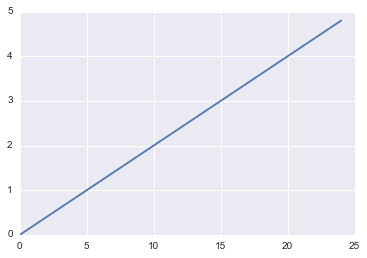

In [45]:

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)
print t
# red dashes, blue squares and green triangles
plt.plot(t)
plt.show()

In [127]:

class LinRegLearner(object):

    def __init__(self, verbose = False):
        pass # move along, these aren't the drones you're looking for

    def addEvidence(self,dataX,dataY):
        """
        @summary: Add training data to learner
        @param dataX: X values of data to add
        @param dataY: the Y training values
        """

        # slap on 1s column so linear regression finds a constant term
        newdataX = np.ones([dataX.shape[0],dataX.shape[1]+1])
        newdataX[:,0:dataX.shape[1]]=dataX

        # build and save the model
        self.model_coefs, residuals, rank, s = np.linalg.lstsq(newdataX, dataY)
        
    def query(self,points):
        """
        @summary: Estimate a set of test points given the model we built.
        @param points: should be a numpy array with each row corresponding to a specific query.
        @returns the estimated values according to the saved model.
        """
        return (self.model_coefs[:-1] * points).sum(axis = 1) + self.model_coefs[-1]

print 'ok'

file = 'Istanbul.csv'
inf = open('Istanbul.csv')
data = None
if file == 'Istanbul.csv':
    data = np.array([map(float, s.strip().split(',')[1:]) for s in inf.readlines()[1:]])
else:
    data = np.array([map(float, s.strip().split(',')) for s in inf.readlines()])

for i in range(4):
    # compute how much of the data is training and testing
    train_rows = int(0.6* data.shape[0])
    test_rows = data.shape[0] - train_rows

    # separate out training and testing data
    trainX = data[:train_rows,0:-1]
    trainY = data[:train_rows,-1]
    testX = data[train_rows:,0:-1]
    testY = data[train_rows:,-1]

    # create a learner and train it
    learner = LinRegLearner(verbose = True) # create a LinRegLearner
    learner.addEvidence(trainX, trainY) # train it

    # evaluate in sample
    predY = learner.query(trainX) # get the predictions
    rmse = math.sqrt(((trainY - predY) ** 2).sum()/trainY.shape[0])
    print
    print "In sample results"
    print "RMSE: ", rmse
    c = np.corrcoef(predY, y=trainY)
    print "corr: ", c[0,1]

    # evaluate out of sample
    predY = learner.query(testX) # get the predictions
    rmse = math.sqrt(((testY - predY) ** 2).sum()/testY.shape[0])
    print
    print "Out of sample results"
    print "RMSE: ", rmse
    c = np.corrcoef(predY, y=testY)
    print "corr: ", c[0,1]




ok

In sample results
RMSE:  0.00528577751921
corr:  0.893488459362

Out of sample results
RMSE:  0.00403140544617
corr:  0.889492715519

In sample results
RMSE:  0.00528577751921
corr:  0.893488459362

Out of sample results
RMSE:  0.00403140544617
corr:  0.889492715519

In sample results
RMSE:  0.00528577751921
corr:  0.893488459362

Out of sample results
RMSE:  0.00403140544617
corr:  0.889492715519

In sample results
RMSE:  0.00528577751921
corr:  0.893488459362

Out of sample results
RMSE:  0.00403140544617
corr:  0.889492715519
